# Importing data

In [682]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [683]:
def getYFinanceData(ticker, period, interval):
  dataF = yf.download(ticker, period=period, interval=interval)

  dataF.iloc[:,:]
  #dataF.Open.iloc

  df = pd.DataFrame(dataF)

  # use df index, convert DateTime to  a column instead of index
  df.reset_index(inplace=True)

  # delete Adj Close
  df = df.drop(['Adj Close'], axis=1)

  # rename Datetime to "Gmt time"
  df = df.rename(columns={'Datetime':'G mt time'})
  
  # rename Date to "Gmt time"
  df = df.rename(columns={'Date':'Gmt time'})

  try:
    df['G mt time']=pd.to_datetime(df['G mt time'],format='%d.%m.%Y %H:%M:%S')
    df.set_index("G mt time", inplace=True)
  except ValueError:
    df['Gmt time']=pd.to_datetime(df['Gmt time'],format='%Y-%m-%d')
    df.set_index("Gmt time", inplace=True)
  df=df[df.High!=df.Low]

  return df

In [741]:
df = getYFinanceData("CL=F", "365d", "1h")
dxy_df = getYFinanceData("DX-Y.NYB", "365d", "1h") 

df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
G mt time,,,,,
2023-02-22 03:00:00-05:00,75.459999,75.709999,75.370003,75.669998,3289
2023-02-22 04:00:00-05:00,75.669998,75.680000,74.959999,75.169998,13726
2023-02-22 05:00:00-05:00,75.169998,75.589996,74.949997,75.470001,9419
2023-02-22 06:00:00-05:00,75.470001,75.809998,75.339996,75.599998,9852
2023-02-22 07:00:00-05:00,75.589996,76.059998,75.559998,75.870003,10556
...,...,...,...,...,...
2024-05-03 01:00:00-04:00,79.129997,79.250000,79.120003,79.190002,862
2024-05-03 02:00:00-04:00,79.190002,79.230003,79.050003,79.209999,4877
2024-05-03 03:00:00-04:00,79.209999,79.389999,79.180000,79.220001,8177


In [742]:
dxy_df


,Open,High,Low,Close,Volume
G mt time,,,,,
2023-02-22 00:00:00-05:00,104.111000,104.177002,104.102997,104.107002,0
2023-02-22 01:00:00-05:00,104.108002,104.137001,104.083000,104.117996,0
2023-02-22 02:00:00-05:00,104.119003,104.146004,104.030998,104.102997,0
2023-02-22 03:00:00-05:00,104.103996,104.262001,104.069000,104.242996,0
2023-02-22 04:00:00-05:00,104.242996,104.306000,104.198997,104.275002,0
...,...,...,...,...,...
2024-05-03 01:00:00-04:00,105.257004,105.263000,105.200996,105.237000,0
2024-05-03 02:00:00-04:00,105.237000,105.308998,105.232002,105.306999,0
2024-05-03 03:00:00-04:00,105.306999,105.344002,105.241997,105.274002,0


## Data Preparation

In [743]:
df["EMA_slow"]=ta.ema(df.Close, length=50)
df["EMA_fast"]=ta.ema(df.Close, length=30)
df['RSI']=ta.rsi(df.Close, length=10)
my_bbands = ta.bbands(df.Close, length=15, std=1.5)
df['ATR']=ta.atr(df.High, df.Low, df.Close, length=7)
df=df.join(my_bbands)

# set the DXY column of df to the "Close" column of dxy_df
df['dxy'] = dxy_df['Close']

# write a function that converts the following data

In [744]:
from datetime import datetime

oil_exports = {
    "Jan-2021": 260993,
    "Feb-2021": 204161,
    "Mar-2021": 244763,
    "Apr-2021": 261273,
    "May-2021": 262264,
    "Jun-2021": 280936,
    "Jul-2021": 261443,
    "Aug-2021": 274870,
    "Sep-2021": 233150,
    "Oct-2021": 255018,
    "Nov-2021": 275551,
    "Dec-2021": 301140,
    "Jan-2022": 269384,
    "Feb-2022": 244573,
    "Mar-2022": 281165,
    "Apr-2022": 289948,
    "May-2022": 290742,
    "Jun-2022": 293946,
    "Jul-2022": 299929,
    "Aug-2022": 302170,
    "Sep-2022": 295628,
    "Oct-2022": 296824,
    "Nov-2022": 299355,
    "Dec-2022": 311074,
    "Jan-2023": 290369,
    "Feb-2023": 272596,
    "Mar-2023": 349386,
    "Apr-2023": 293446,
    "May-2023": 299222,
    "Jun-2023": 300836,
    "Jul-2023": 310890,
    "Aug-2023": 309950,
    "Sep-2023": 301794,
    "Oct-2023": 311650,
    "Nov-2023": 306664,
    "Dec-2023": 357853,
    "Jan-2024": 321532,
    "Feb-2024": 318568,
}


def get_oil_export(date):
    # convert 'date' which is a Timestamp type to string
    # date = datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S') 

    
    # # Parse the date string
    date = datetime.strptime(str(date), "%Y-%m-%d %H:%M:%S%z")
    
    # Format the date to match the keys in the dictionary
    date_key = date.strftime("%b-%Y")
    
    # Get the oil export for the given date
    return oil_exports.get(date_key, "Date not found")
  
df['oil_exports'] = df.index.map(get_oil_export)

In [745]:
inflation_rates = {
    "March 31, 2024": "3.48%",
    "February 29, 2024": "3.15%",
    "January 31, 2024": "3.09%",
    "December 31, 2023": "3.35%",
    "November 30, 2023": "3.14%",
    "October 31, 2023": "3.24%",
    "September 30, 2023": "3.70%",
    "August 31, 2023": "3.67%",
    "July 31, 2023": "3.18%",
    "June 30, 2023": "2.97%",
    "May 31, 2023": "4.05%",
    "April 30, 2023": "4.93%",
    "March 31, 2023": "4.98%",
    "February 28, 2023": "6.04%",
    "January 31, 2023": "6.41%",
    "December 31, 2022": "6.45%",
    "November 30, 2022": "7.11%",
    "October 31, 2022": "7.75%",
    "September 30, 2022": "8.20%",
    "August 31, 2022": "8.26%",
    "July 31, 2022": "8.52%",
    "June 30, 2022": "9.06%",
    "May 31, 2022": "8.58%",
    "April 30, 2022": "8.26%",
    "March 31, 2022": "8.54%",
    "February 28, 2022": "7.87%",
    "January 31, 2022": "7.48%",
    "December 31, 2021": "7.04%",
    "November 30, 2021": "6.81%",
    "October 31, 2021": "6.22%",
    "September 30, 2021": "5.39%",
    "August 31, 2021": "5.25%",
    "July 31, 2021": "5.37%",
    "June 30, 2021": "5.39%",
    "May 31, 2021": "4.99%",
    "April 30, 2021": "4.16%",
    "March 31, 2021": "2.62%",
    "February 28, 2021": "1.68%",
    "January 31, 2021": "1.40%",
    "December 31, 2020": "1.36%",
    "November 30, 2020": "1.17%",
    "October 31, 2020": "1.18%",
    "September 30, 2020": "1.37%",
    "August 31, 2020": "1.31%",
    "July 31, 2020": "0.99%",
    "June 30, 2020": "0.65%",
    "May 31, 2020": "0.12%",
    "April 30, 2020": "0.33%",
    "March 31, 2020": "1.54%",
    "February 29, 2020": "2.33%",
}

from datetime import datetime

def get_inflation_rate(date_str):
    # Parse the date string
    date = datetime.strptime(str(date_str), "%Y-%m-%d %H:%M:%S%z")
    
    # Format the date to match the keys in the dictionary
    date_key = date.strftime("%B %d, %Y")
    
    # Get the inflation rate for the given month and year
    for key in inflation_rates.keys():
        if date_key in key:
            return inflation_rates[key]
    
    return "Date not found"

df['inflation_rate'] = df.index.map(get_inflation_rate)

In [746]:
def get_world_production(date_str):
    # Parse the date string
    date = datetime.strptime(str(date_str), "%Y-%m-%d %H:%M:%S%z")
    
    # Format the date to match the format in the CSV file
    date_str = date.strftime("%Y-%m")
    
    # Load the CSV data into a DataFrame
    df = pd.read_csv('world-oil-demand-supply.csv', delimiter=';')
    
    # Filter the DataFrame to rows where the date matches and the Indicator is "world production"
    filtered_df = df[(df['Date'] == date_str) & (df['Indicator'] == 'world production')]
    
    # If there is a matching row, return the value. Otherwise, return "Date not found".
    if not filtered_df.empty:
        return filtered_df['Value'].values[0]
    else:
        return "Date not found"
      
df['world_production'] = df.index.map(get_world_production)

def get_world_consumption(date_str):
    # Parse the date string
    date = datetime.strptime(str(date_str), "%Y-%m-%d %H:%M:%S%z")
    
    # Format the date to match the format in the CSV file
    date_str = date.strftime("%Y-%m")
    
    # Load the CSV data into a DataFrame
    df = pd.read_csv('world-oil-demand-supply.csv', delimiter=';')
    
    # Filter the DataFrame to rows where the date matches and the Indicator is "world production"
    filtered_df = df[(df['Date'] == date_str) & (df['Indicator'] == 'world consumption')]
    
    # If there is a matching row, return the value. Otherwise, return "Date not found".
    if not filtered_df.empty:
        return filtered_df['Value'].values[0]
    else:
        return "Date not found"
      
df['world_consumption'] = df.index.map(get_world_consumption)

## Data Cleaning

In [747]:
# df where df['oil_exports'] is not 'Date not found'
df = df[df['oil_exports'] != 'Date not found']
# df = df[df['inflation_rate'] != 'Date not found']

# if df['inflation_rate']== 'Date not found'], then use the previous row's rate
df['inflation_rate'] = df['inflation_rate'].replace('Date not found', np.nan).ffill()
# convert df['inflation_rate'] from string representation of percentage to a float value
df['inflation_rate'] = df['inflation_rate'].str.rstrip('%').astype('float') / 100.0

In [748]:

df['world_production'] = df['world_production'].replace('Date not found', np.nan).ffill()
df = df[df['world_production'] != 'Date not found'] 

df['world_consumption'] = df['world_consumption'].replace('Date not found', np.nan).ffill()
df = df[df['world_consumption'] != 'Date not found'] 

In [749]:
df


,Open,High,Low,Close,Volume,EMA_slow,EMA_fast,RSI,ATR,BBL_15_1.5,BBM_15_1.5,BBU_15_1.5,BBB_15_1.5,BBP_15_1.5,dxy,oil_exports,inflation_rate,world_production,world_consumption
G mt time,,,,,,,,,,,,,,,,,,,
2023-02-22 03:00:00-05:00,75.459999,75.709999,75.370003,75.669998,3289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.242996,272596,NaN,NaN,NaN
2023-02-22 04:00:00-05:00,75.669998,75.680000,74.959999,75.169998,13726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.275002,272596,NaN,NaN,NaN
2023-02-22 05:00:00-05:00,75.169998,75.589996,74.949997,75.470001,9419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.339996,272596,NaN,NaN,NaN
2023-02-22 06:00:00-05:00,75.470001,75.809998,75.339996,75.599998,9852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.297997,272596,NaN,NaN,NaN
2023-02-22 07:00:00-05:00,75.589996,76.059998,75.559998,75.870003,10556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.114998,272596,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29 19:00:00-05:00,78.260002,78.419998,78.260002,78.389999,910,78.325130,78.407577,49.358832,0.374498,78.068920,78.476000,78.883080,1.037464,0.394369,104.109001,318568,0.0315,101.8185,102.055351
2024-02-29 20:00:00-05:00,78.379997,78.559998,78.379997,78.480003,1802,78.331204,78.412249,51.560583,0.346713,78.064965,78.470667,78.876369,1.034022,0.511506,104.056000,318568,0.0315,101.8185,102.055351
2024-02-29 21:00:00-05:00,78.480003,78.519997,78.419998,78.480003,845,78.337039,78.416620,51.560583,0.311468,78.069468,78.474667,78.879866,1.032687,0.506584,104.066002,318568,0.0315,101.8185,102.055351


## Evaluating the Data

In [750]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
st=100
dfpl = df[:]
#dfpl.reset_index(inplace=True)
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close']),

                # go.Scatter(x=dfpl.index, y=dfpl['BBL_15_1.5'], 
                #            line=dict(color='green', width=1), 
                #            name="BBL"),
                # go.Scatter(x=dfpl.index, y=dfpl['BBU_15_1.5'], 
                #            line=dict(color='green', width=1), 
                #            name="BBU"),
                go.Scatter(x=dfpl.index, y=dfpl['EMA_fast'], 
                           line=dict(color='black', width=1), 
                           name="EMA_fast"),
                go.Scatter(x=dfpl.index, y=dfpl['EMA_slow'], 
                           line=dict(color='blue', width=1), 
                           name="EMA_slow")])

fig.update_layout(width=1200, height=800)
fig.show()

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'EMA_slow'}>,
        <Axes: title={'center': 'EMA_fast'}>,
        <Axes: title={'center': 'RSI'}>],
       [<Axes: title={'center': 'ATR'}>,
        <Axes: title={'center': 'BBL_15_1.5'}>,
        <Axes: title={'center': 'BBM_15_1.5'}>,
        <Axes: title={'center': 'BBU_15_1.5'}>],
       [<Axes: title={'center': 'BBB_15_1.5'}>,
        <Axes: title={'center': 'BBP_15_1.5'}>,
        <Axes: title={'center': 'dxy'}>,
        <Axes: title={'center': 'inflation_rate'}>],
       [<Axes: title={'center': 'world_production'}>,
        <Axes: title={'center': 'world_consumption'}>, <Axes: >,
        <Axes: >]], dtype=object)

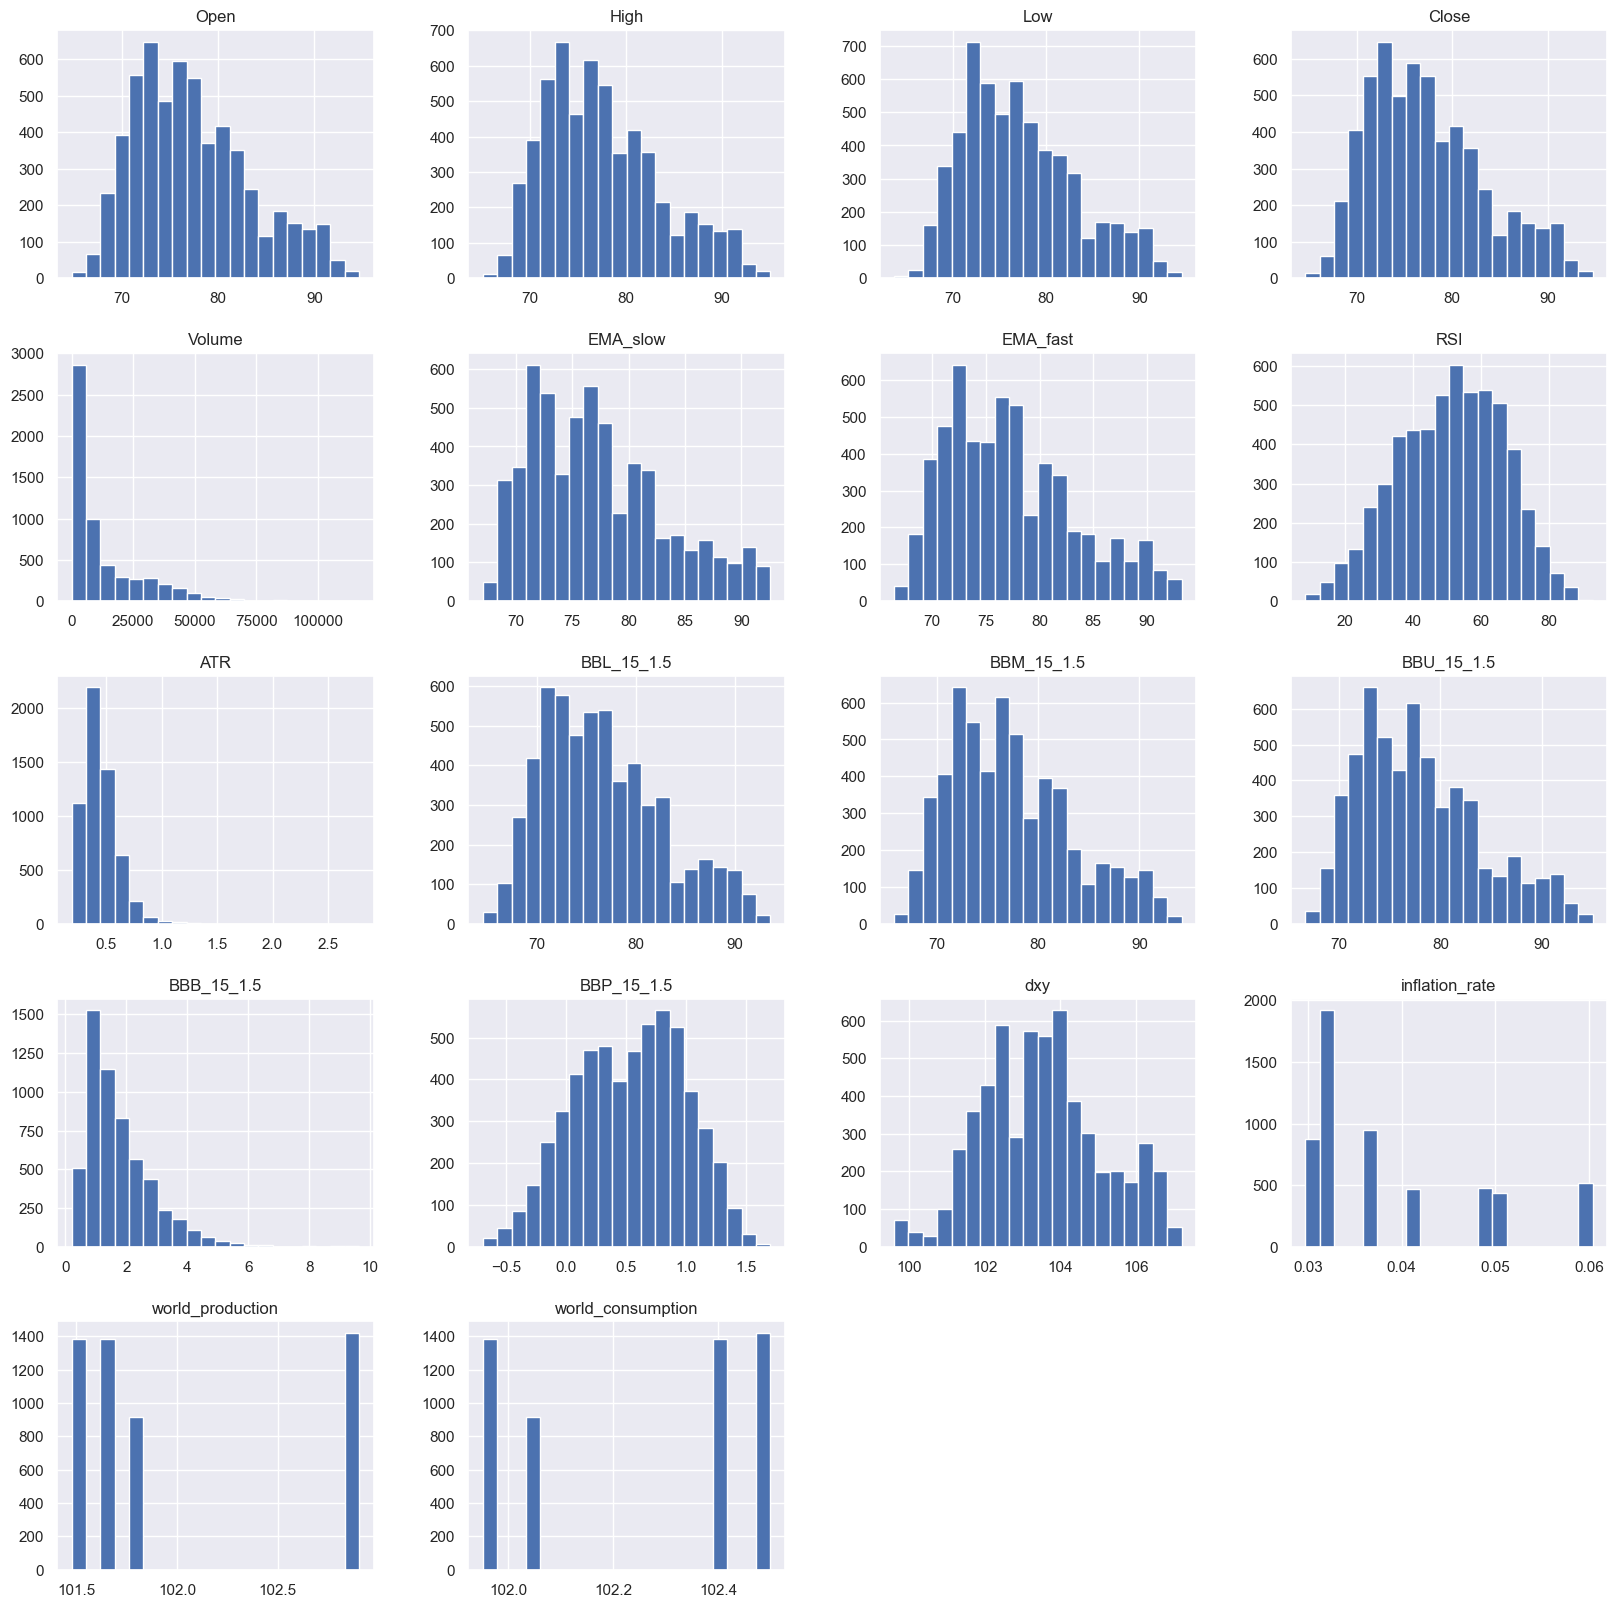

In [751]:
sns.set(rc={'figure.figsize':(20,20)})
df.hist(bins=20)


In [752]:
# sns.set(rc={'figure.figsize':(6,6)})
# plt.scatter(df['Close'], df['dxy'] )
# plt.xlabel('Crude Oil Price')
# plt.ylabel('DXY')

In [753]:
mycols=['Close','dxy', 'oil_exports', 'inflation_rate', 'world_production', 'world_consumption']
df[mycols].corr().round(2)

,Close,dxy,oil_exports,inflation_rate,world_production,world_consumption
Close,1.00,0.49,-0.28,-0.19,0.17,0.49
dxy,0.49,1.00,-0.03,-0.05,0.48,0.37
oil_exports,-0.28,-0.03,1.00,0.06,0.55,0.39
inflation_rate,-0.19,-0.05,0.06,1.00,-0.42,-0.60
world_production,0.17,0.48,0.55,-0.42,1.00,0.71
world_consumption,0.49,0.37,0.39,-0.60,0.71,1.00


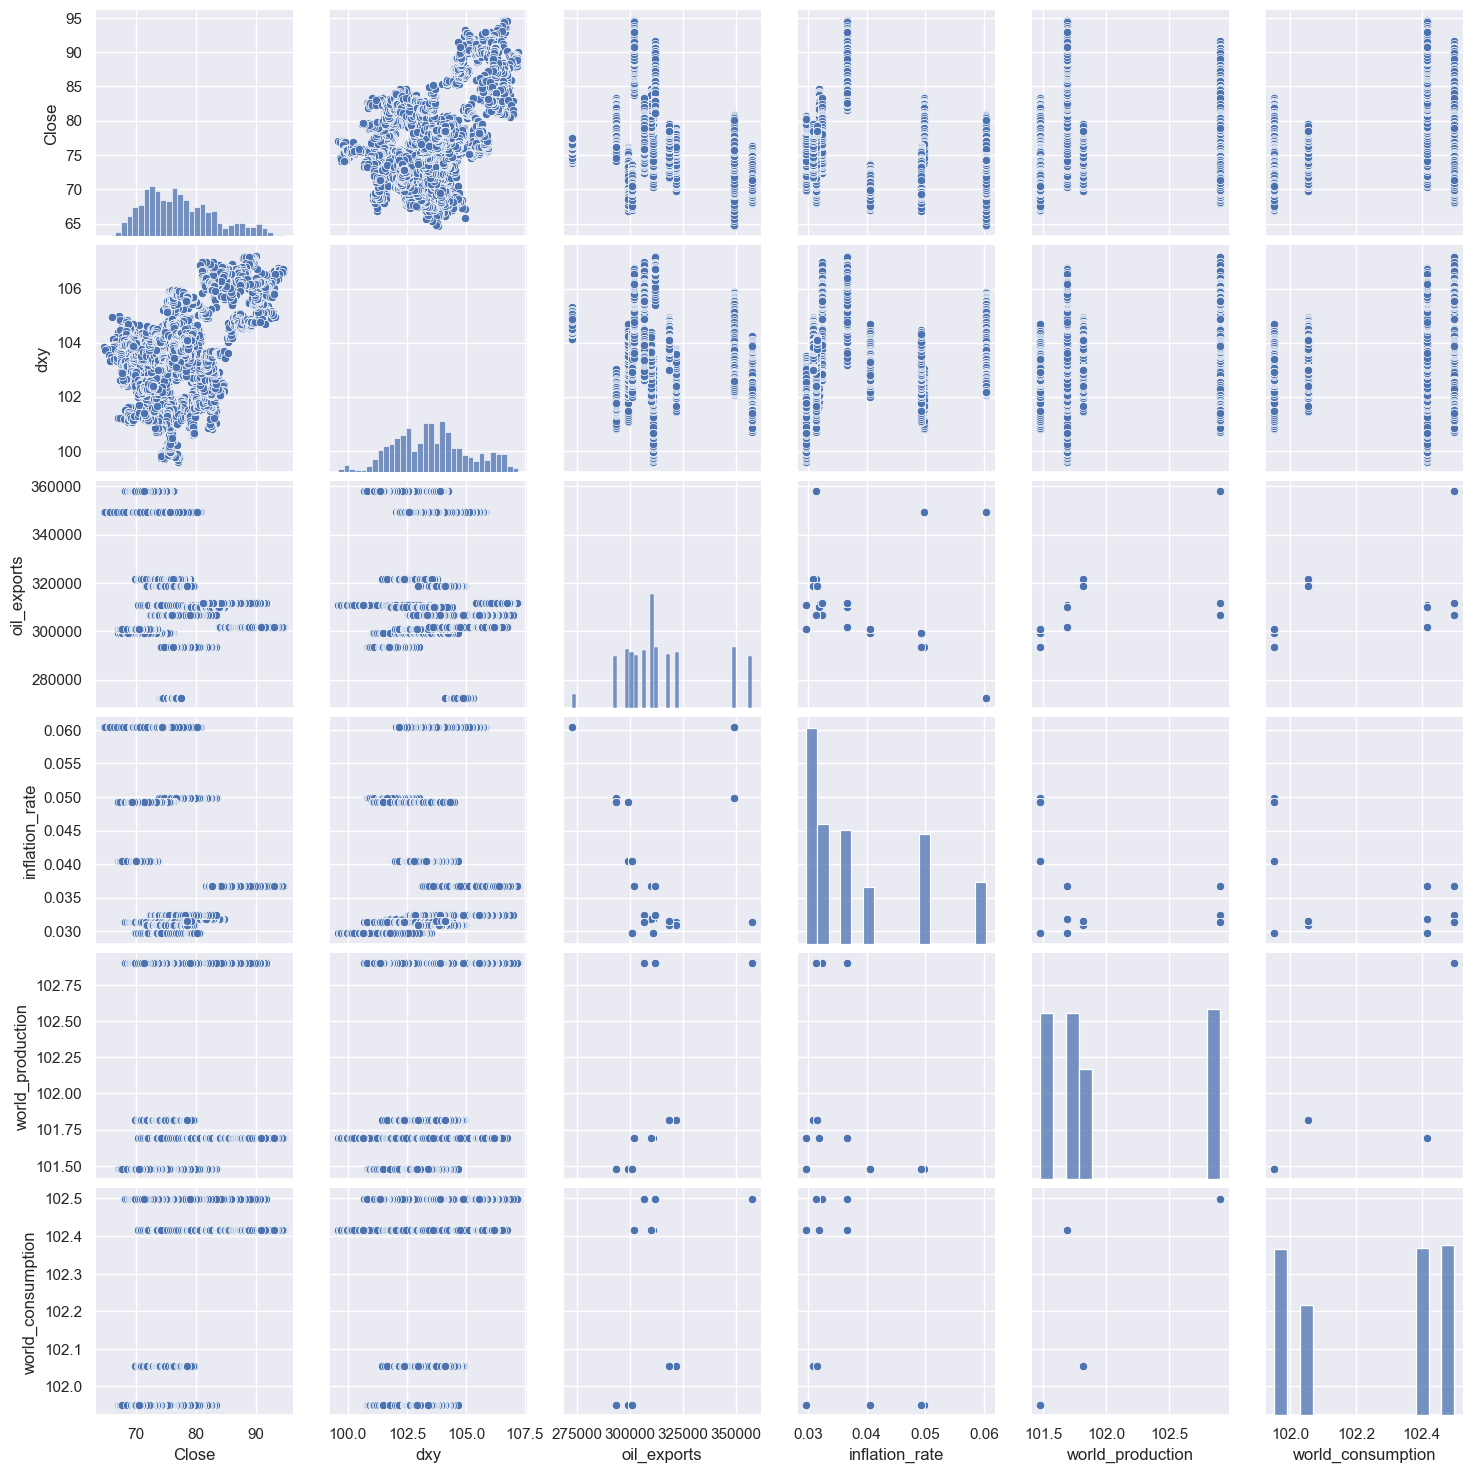

In [754]:
sns.pairplot(df[mycols])

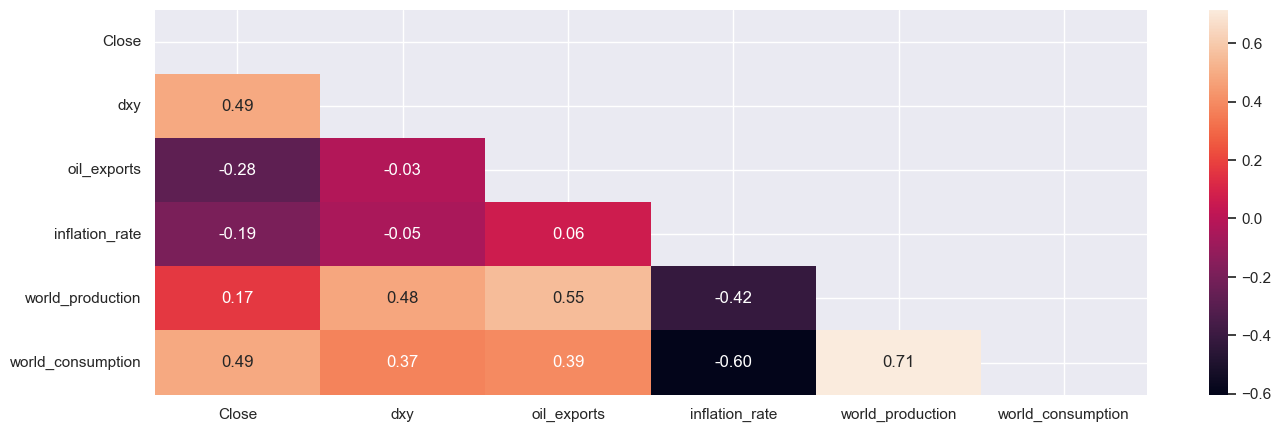

In [755]:
plt.figure(figsize = (16,5))

corr = df[mycols].corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(np.ones_like(corr))

dataplot = sns.heatmap(corr, annot=True, fmt=".2f", mask=matrix)
plt.show()

In [756]:
df.dropna(inplace=True)

# pick specified columns and remove the rest
df = df[['Close','inflation_rate', 'world_production', 'world_consumption']]

X = df.drop('Close', axis=1)
y = df['Close']

In [757]:
from sklearn.preprocessing import MinMaxScaler

column_names = X.columns.tolist()
scaler = MinMaxScaler() # default = (0, 1)
X = pd.DataFrame(scaler.fit_transform(X), columns = column_names)
X.describe().round(1)

,inflation_rate,world_production,world_consumption
count,5094.0,5094.0,5094.0
mean,0.3,0.4,0.5
std,0.3,0.4,0.4
min,0.0,0.0,0.0
25%,0.1,0.0,0.0
50%,0.1,0.1,0.8
75%,0.5,1.0,1.0
max,1.0,1.0,1.0


In [758]:
# Training, Testing Split

from sklearn.model_selection import train_test_split

# 90:10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10, shuffle=True)

X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

## Model 1: Linear Regression

In [759]:
# Evaluation Metrics

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [760]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression().fit(X_train, y_train)

In [761]:
print('Linear Regression Parameters')
print('----------------------------')
print('coeffs are ', linear_reg.coef_)
print('intercept is ', linear_reg.intercept_)

Linear Regression Parameters
----------------------------
coeffs are  [ 6.72060153 -5.8986878  14.17254967]
intercept is  69.95069875864165


In [762]:
y_pred =linear_reg.predict(X_train)
print('Training Dataset')
print('----------------------------')
print('r2_score is ', r2_score(y_train,y_pred))
print('mse is ', mean_squared_error(y_train,y_pred))
print('mae is ', mean_absolute_percentage_error(y_train,y_pred))

Training Dataset
----------------------------
r2_score is  0.3972307190762978
mse is  22.684164323036423
mae is  0.052190637475887286


In [763]:
y_pred =linear_reg.predict(X_test)
print('Testing Dataset')
print('----------------------------')
print('r2_score is ', r2_score(y_test,y_pred))
print('mse is ', mean_squared_error(y_test,y_pred))
print('mae is ', mean_absolute_percentage_error(y_test,y_pred))

Testing Dataset
----------------------------
r2_score is  0.3880828483736274
mse is  22.684443955383497
mae is  0.052285847846694045


Text(0, 0.5, 'y_pred')

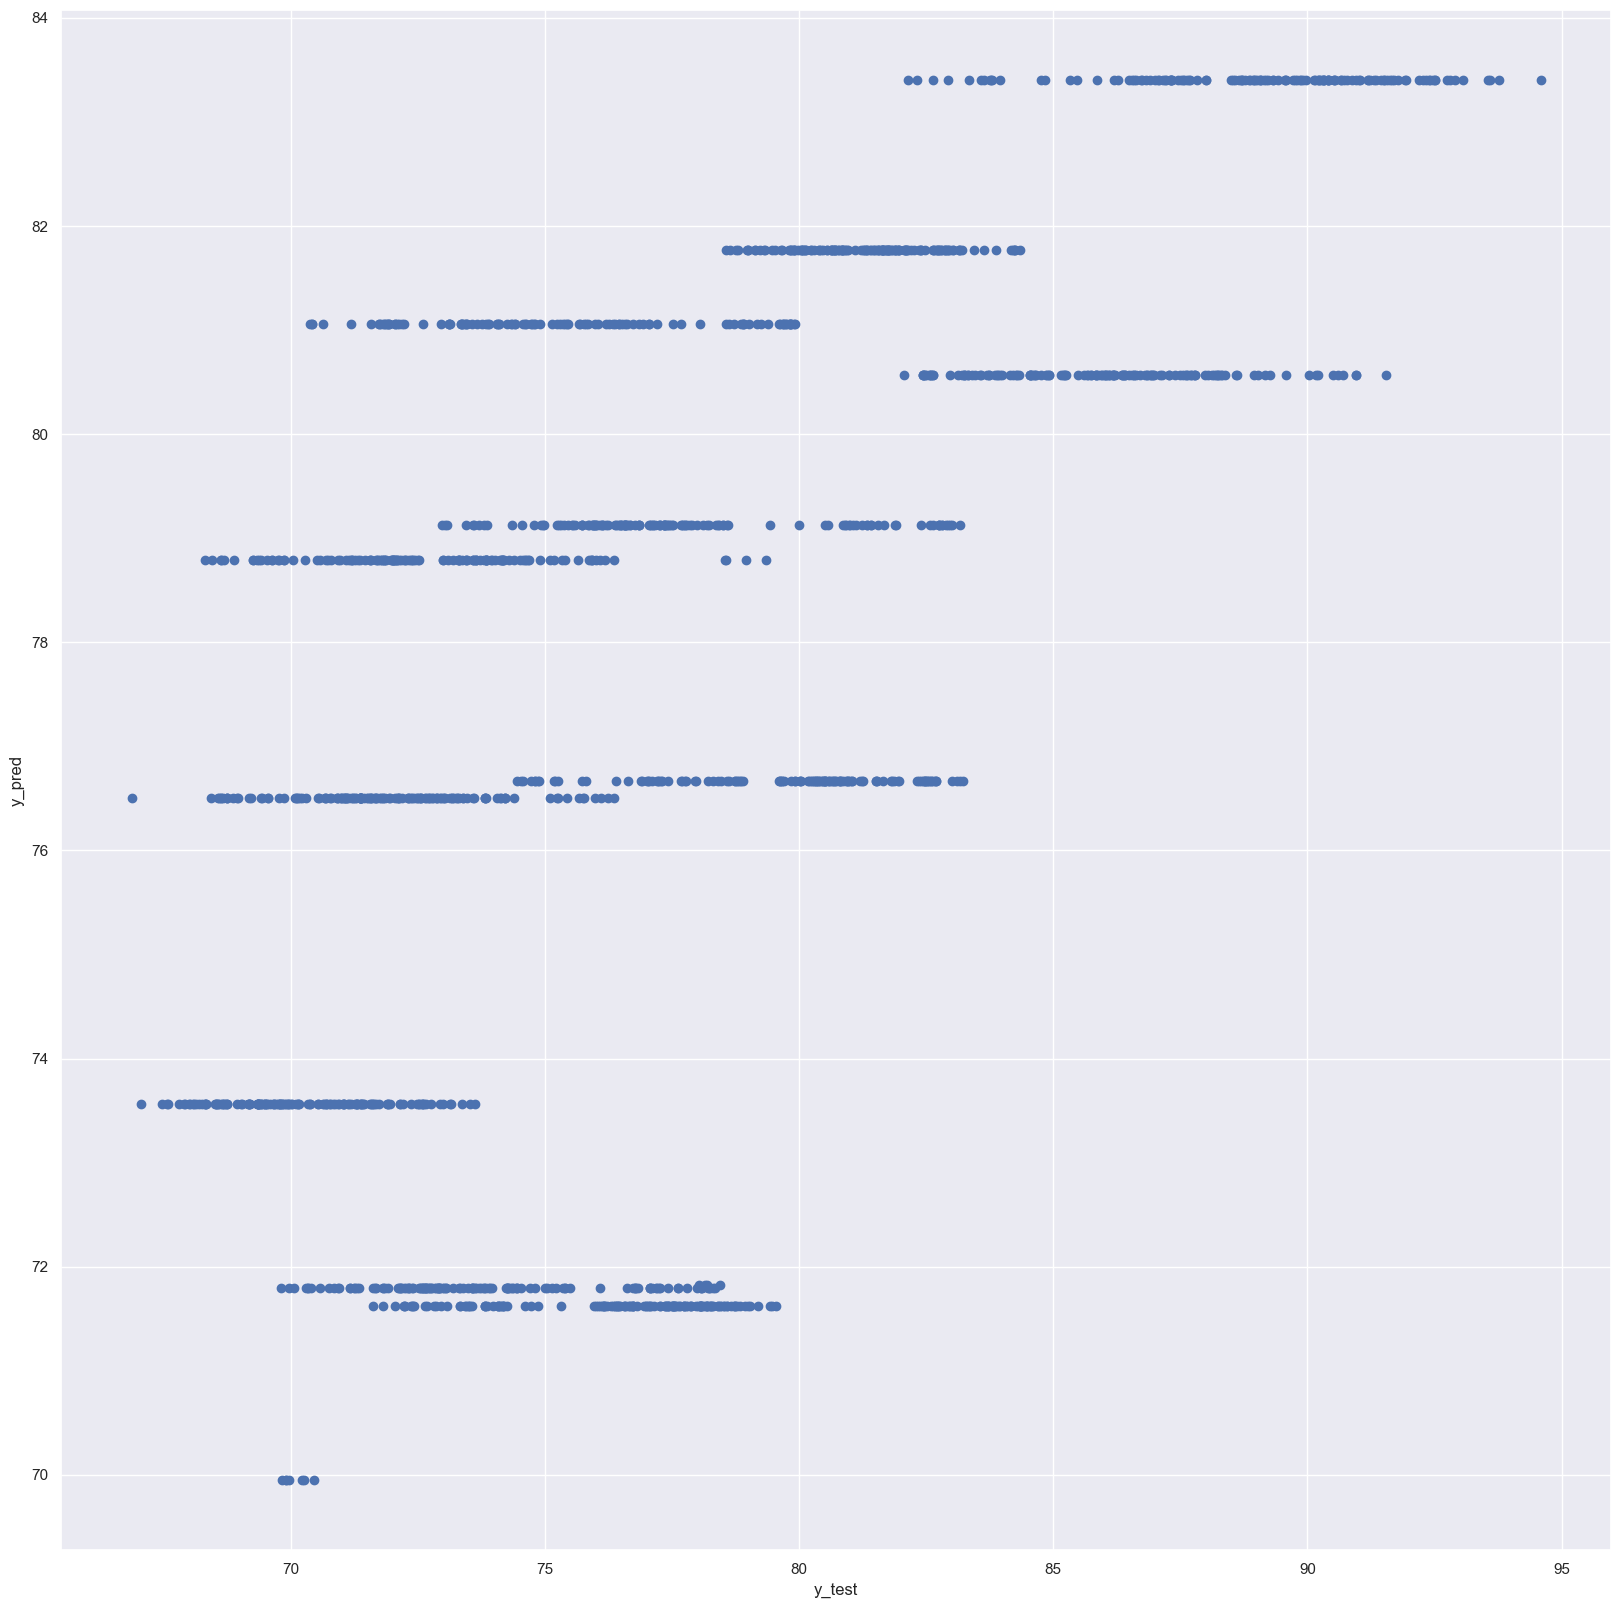

In [764]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

## Model 2: SGD

In [765]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_reg.fit(X_train, y_train)

SGDRegressor()

In [766]:
print('SGD Regression Parameters')
print('----------------------------')
print('coeffs are ', sgd_reg.coef_)
print('intercept is ', sgd_reg.intercept_)

SGD Regression Parameters
----------------------------
coeffs are  [ 6.97945302 -6.03668436 14.42400409]
intercept is  [69.74961284]


In [767]:
y_pred =sgd_reg.predict(X_train)
print('Training Dataset')
print('----------------------------')
print('r2_score is ', r2_score(y_train,y_pred))
print('mse is ', mean_squared_error(y_train,y_pred))
print('mae is ', mean_absolute_percentage_error(y_train,y_pred))

Training Dataset
----------------------------
r2_score is  0.397038416878451
mse is  22.691401278856326
mae is  0.052279511766690344


In [768]:
y_pred =sgd_reg.predict(X_test)
print('Testing Dataset')
print('----------------------------')
print('r2_score is ', r2_score(y_test,y_pred))
print('mse is ', mean_squared_error(y_test,y_pred))
print('mae is ', mean_absolute_percentage_error(y_test,y_pred))

Testing Dataset
----------------------------
r2_score is  0.3871978934875121
mse is  22.717250209406235
mae is  0.05240305238973692


Text(0, 0.5, 'y_test_pred')

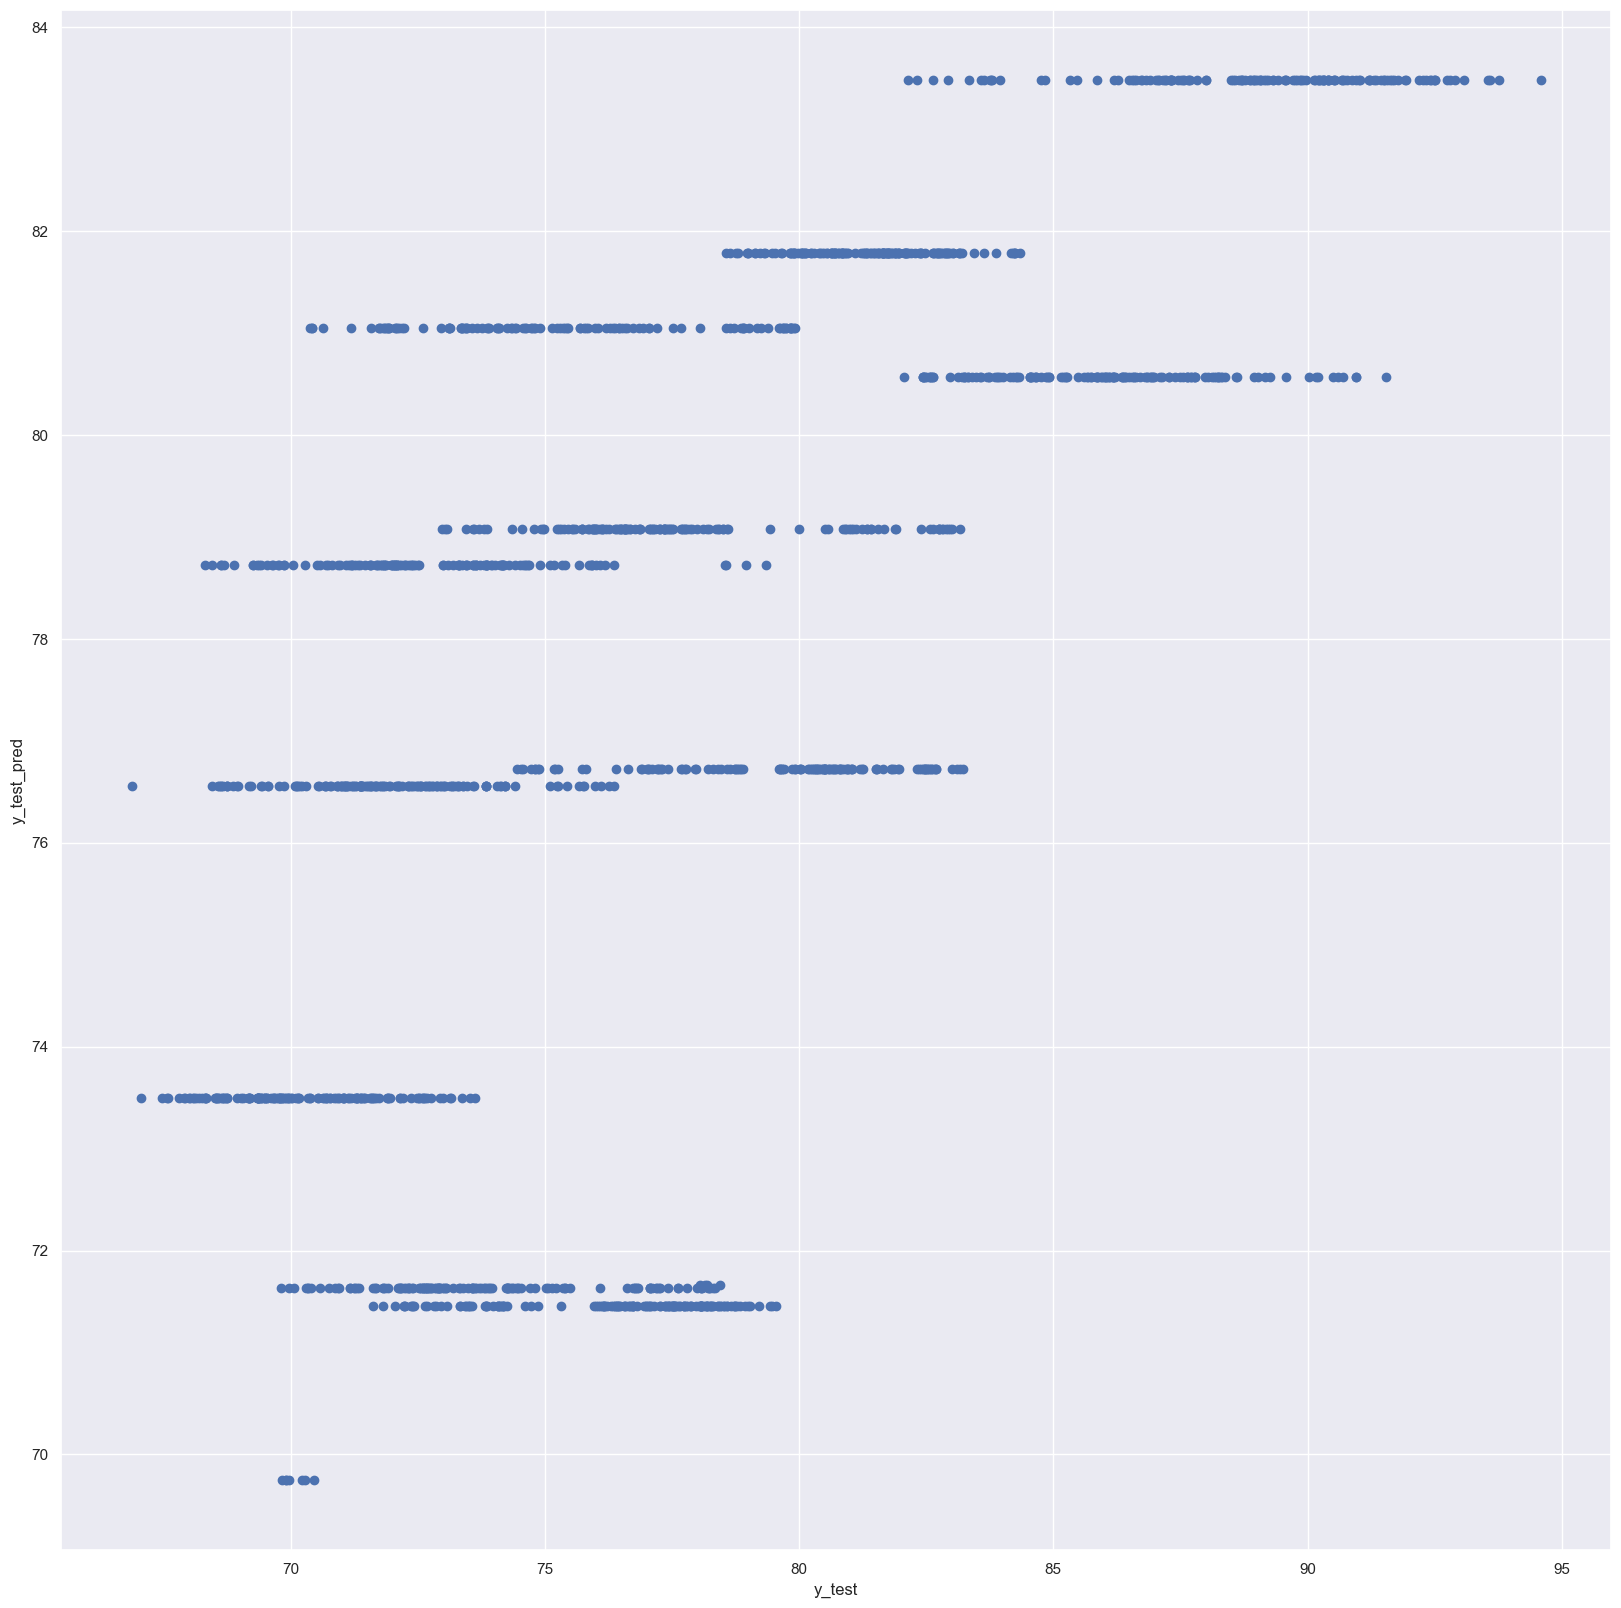

In [769]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')